# FFNN for Image Classification on the MNIST dataset

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
mnist = tf.keras.datasets.mnist
type(mnist)

module

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

In [ ]:
import matplotlib.pyplot as plt

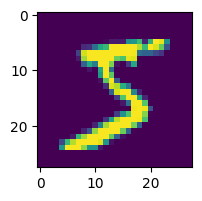

In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_train[0])
plt.show()

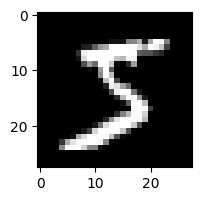


Image is of digit: 5


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_train[0], cmap='gray')
plt.show()
print("\nImage is of digit:", y_train[0])

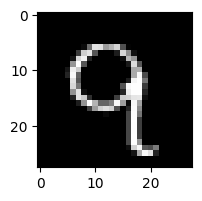


Image is of digit: 9


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_train[434], cmap='gray')
plt.show()
print("\nImage is of digit:", y_train[434])

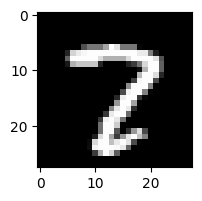


Image is of digit: 7


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_train[12000], cmap='gray')
plt.show()
print("\nImage is of digit:", y_train[12000])

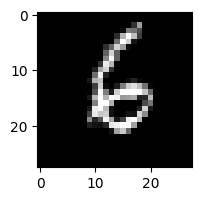


Image is of digit: 6


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_test[2000], cmap='gray')
plt.show()
print("\nImage is of digit:", y_test[2000])

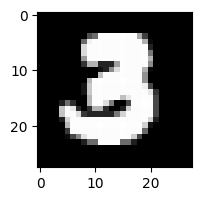


Image is of digit: 3


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_test[200], cmap='gray')
plt.show()
print("\nImage is of digit:", y_test[200])

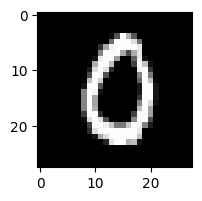


Image is of digit: 0


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_test[1001], cmap='gray')
plt.show()
print("\nImage is of digit:", y_test[1001])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

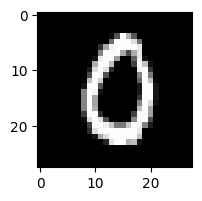


Image is of digit: 0


In [ ]:
plt.figure(figsize=(2,3))
plt.imshow(x_test[1001], cmap='gray')
plt.show()
print("\nImage is of digit:", y_test[1001])

In [ ]:
# Build/Instantiate the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2981 - accuracy: 0.9128 - val_loss: 0.1543 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.0968 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1058 - accuracy: 0.9675 - val_loss: 0.0861 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9735 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0759 - val_accuracy: 0.9756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0577 - accuracy: 0.9811 - val_loss: 0.0688 - val_accuracy

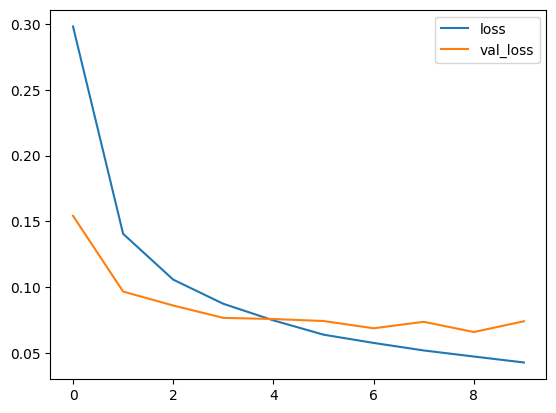

In [ ]:
# plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

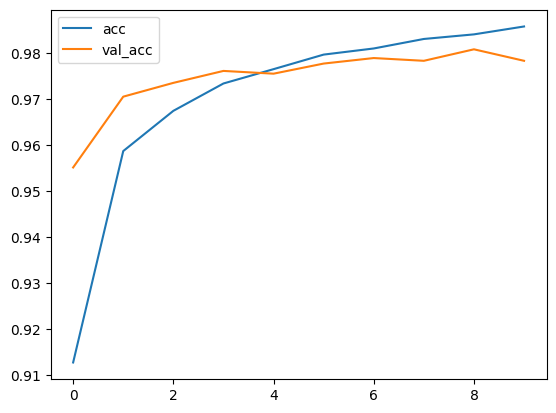

In [ ]:
# plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.0742 - accuracy: 0.9784
[0.07416829466819763, 0.9783999919891357]


In [ ]:
import numpy as np

In [ ]:
model.predict(x_test).shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
model.predict(x_test).argmax(axis=1).shape

313/313 [==============================] - 1s 3ms/step


(10000,)

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_test)

array([[ 972,    0,    2,    1,    0,    1,    1,    1,    2,    0],
       [   0, 1127,    3,    1,    0,    0,    2,    1,    1,    0],
       [   2,    1, 1013,    2,    1,    0,    1,    9,    2,    1],
       [   0,    0,    0,  995,    0,    4,    0,    6,    3,    2],
       [   1,    0,    5,    1,  953,    0,    3,    3,    0,   16],
       [   2,    1,    0,    6,    1,  876,    1,    2,    2,    1],
       [   7,    3,    2,    1,    4,   10,  930,    1,    0,    0],
       [   1,    3,    8,    3,    1,    0,    0, 1009,    0,    3],
       [   3,    1,    5,   16,    4,    5,    2,    5,  928,    5],
       [   3,    2,    0,    7,    7,    3,    0,    5,    1,  981]])

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[ 972    0    2    1    0    1    1    1    2    0]
 [   0 1127    3    1    0    0    2    1    1    0]
 [   2    1 1013    2    1    0    1    9    2    1]
 [   0    0    0  995    0    4    0    6    3    2]
 [   1    0    5    1  953    0    3    3    0   16]
 [   2    1    0    6    1  876    1    2    2    1]
 [   7    3    2    1    4   10  930    1    0    0]
 [   1    3    8    3    1    0    0 1009    0    3]
 [   3    1    5   16    4    5    2    5  928    5]
 [   3    2    0    7    7    3    0    5    1  981]]


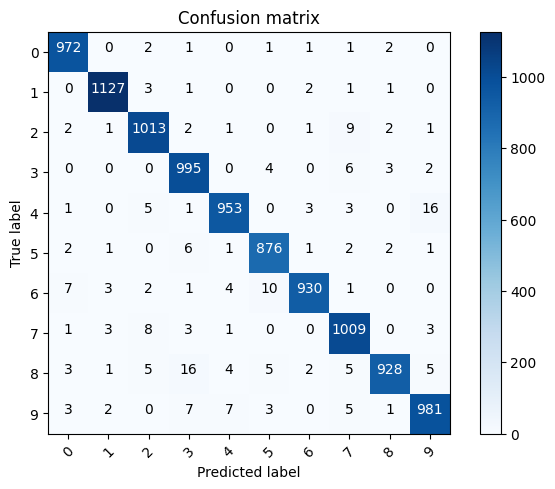

In [ ]:
# Plot confusion matrix
# Kindly dont focus on the details of implementation of the code below
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

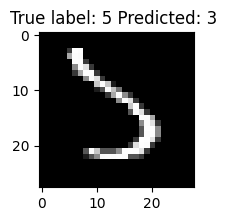

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(2,3))
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s " % (y_test[i], p_test[i]))
plt.show()